In [1]:
import pandas as pd


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.width", 1000)

In [3]:
df = pd.read_csv(r'./BankChurners.csv')
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


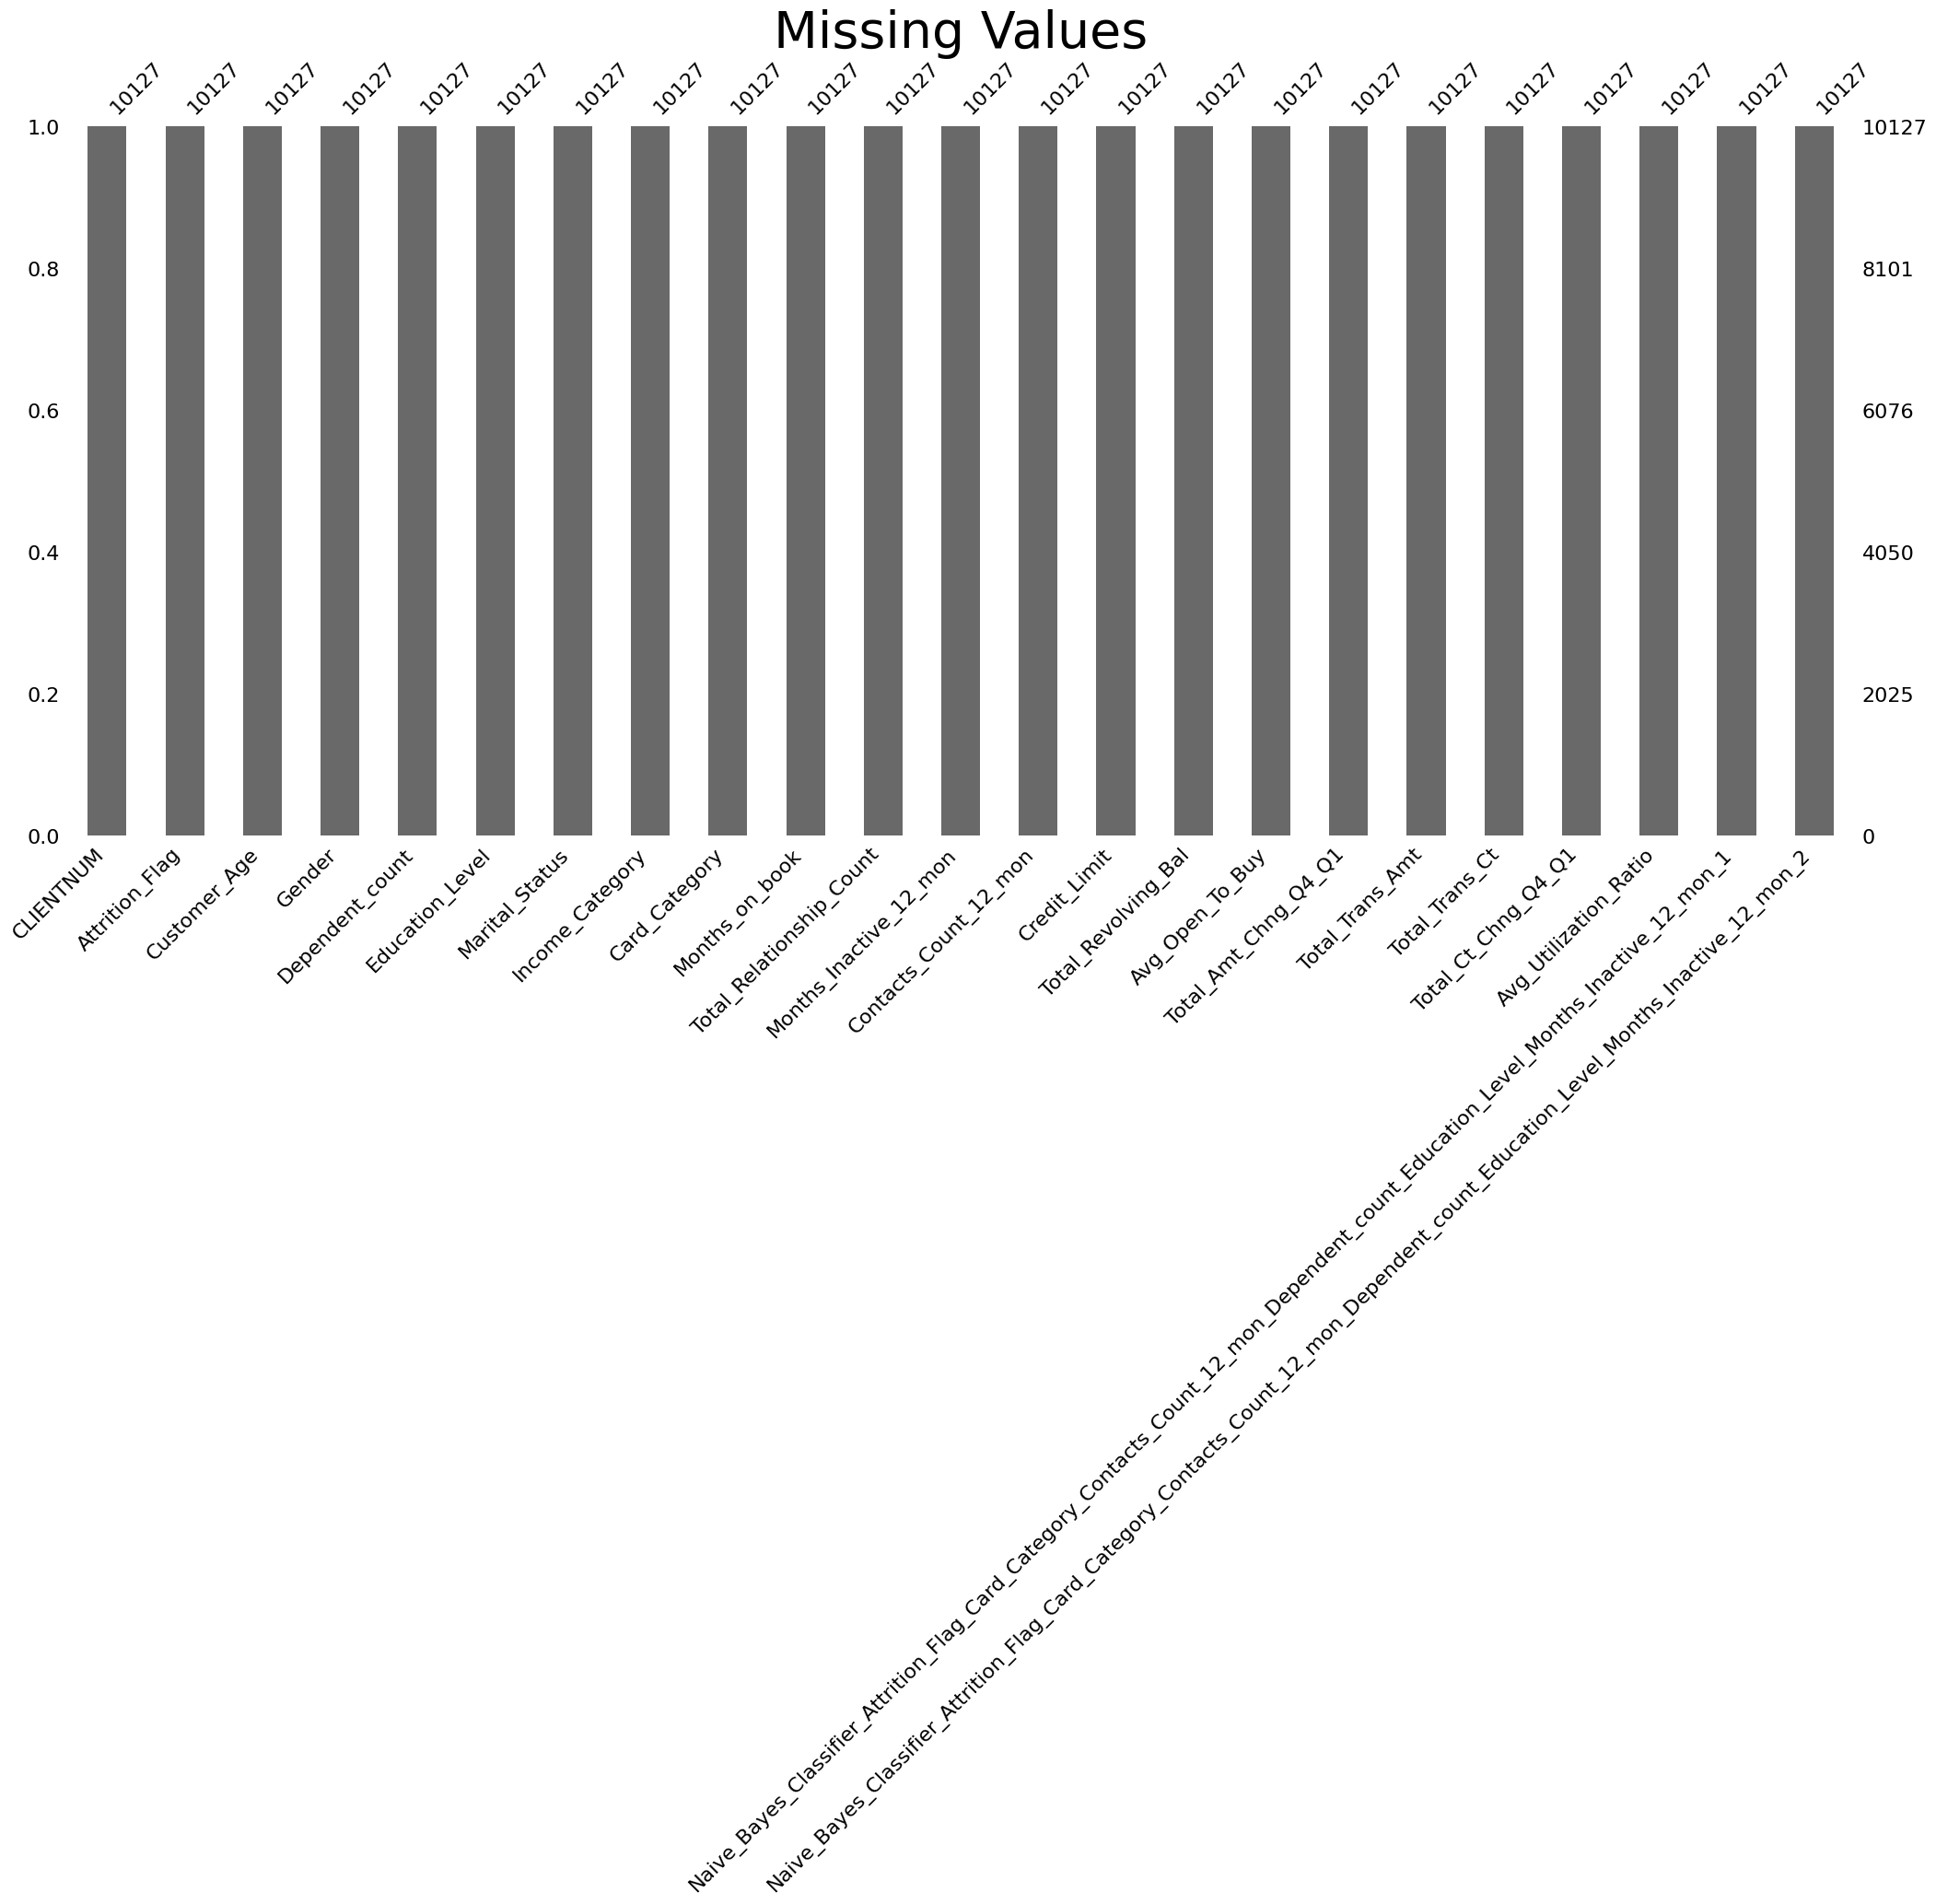

In [6]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(df)
plt.title("Missing Values", fontsize=40)
plt.show()


In [7]:
def group_cols_by_data_type(df):
    """
    Group columns by data type
    :param df: DataFrame
    :return: list of lists of column names grouped by data type
    """
    num_cols, cat_cols, dt_cols, bool_cols = [], [], [], []
    
    num_cols.append(df.select_dtypes(include=['int', 'float']).columns.to_list())
    cat_cols.append(df.select_dtypes(include=['object', 'category']).columns.to_list())
    dt_cols.append(df.select_dtypes(include=['datetime']).columns.to_list())
    bool_cols.append(df.select_dtypes(include=['bool']).columns.to_list())
    
    return num_cols, cat_cols, dt_cols, bool_cols

In [8]:
num_cols, cat_cols, dt_cols, bool_cols = group_cols_by_data_type(df)

array([[<Axes: title={'center': 'CLIENTNUM'}>,
        <Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>,
        <Axes: title={'center': 'Months_on_book'}>],
       [<Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>,
        <Axes: title={'center': 'Contacts_Count_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>],
       [<Axes: title={'center': 'Total_Revolving_Bal'}>,
        <Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_Amt'}>],
       [<Axes: title={'center': 'Total_Trans_Ct'}>,
        <Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>,
        <Axes: title={'center': 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'}>],
      

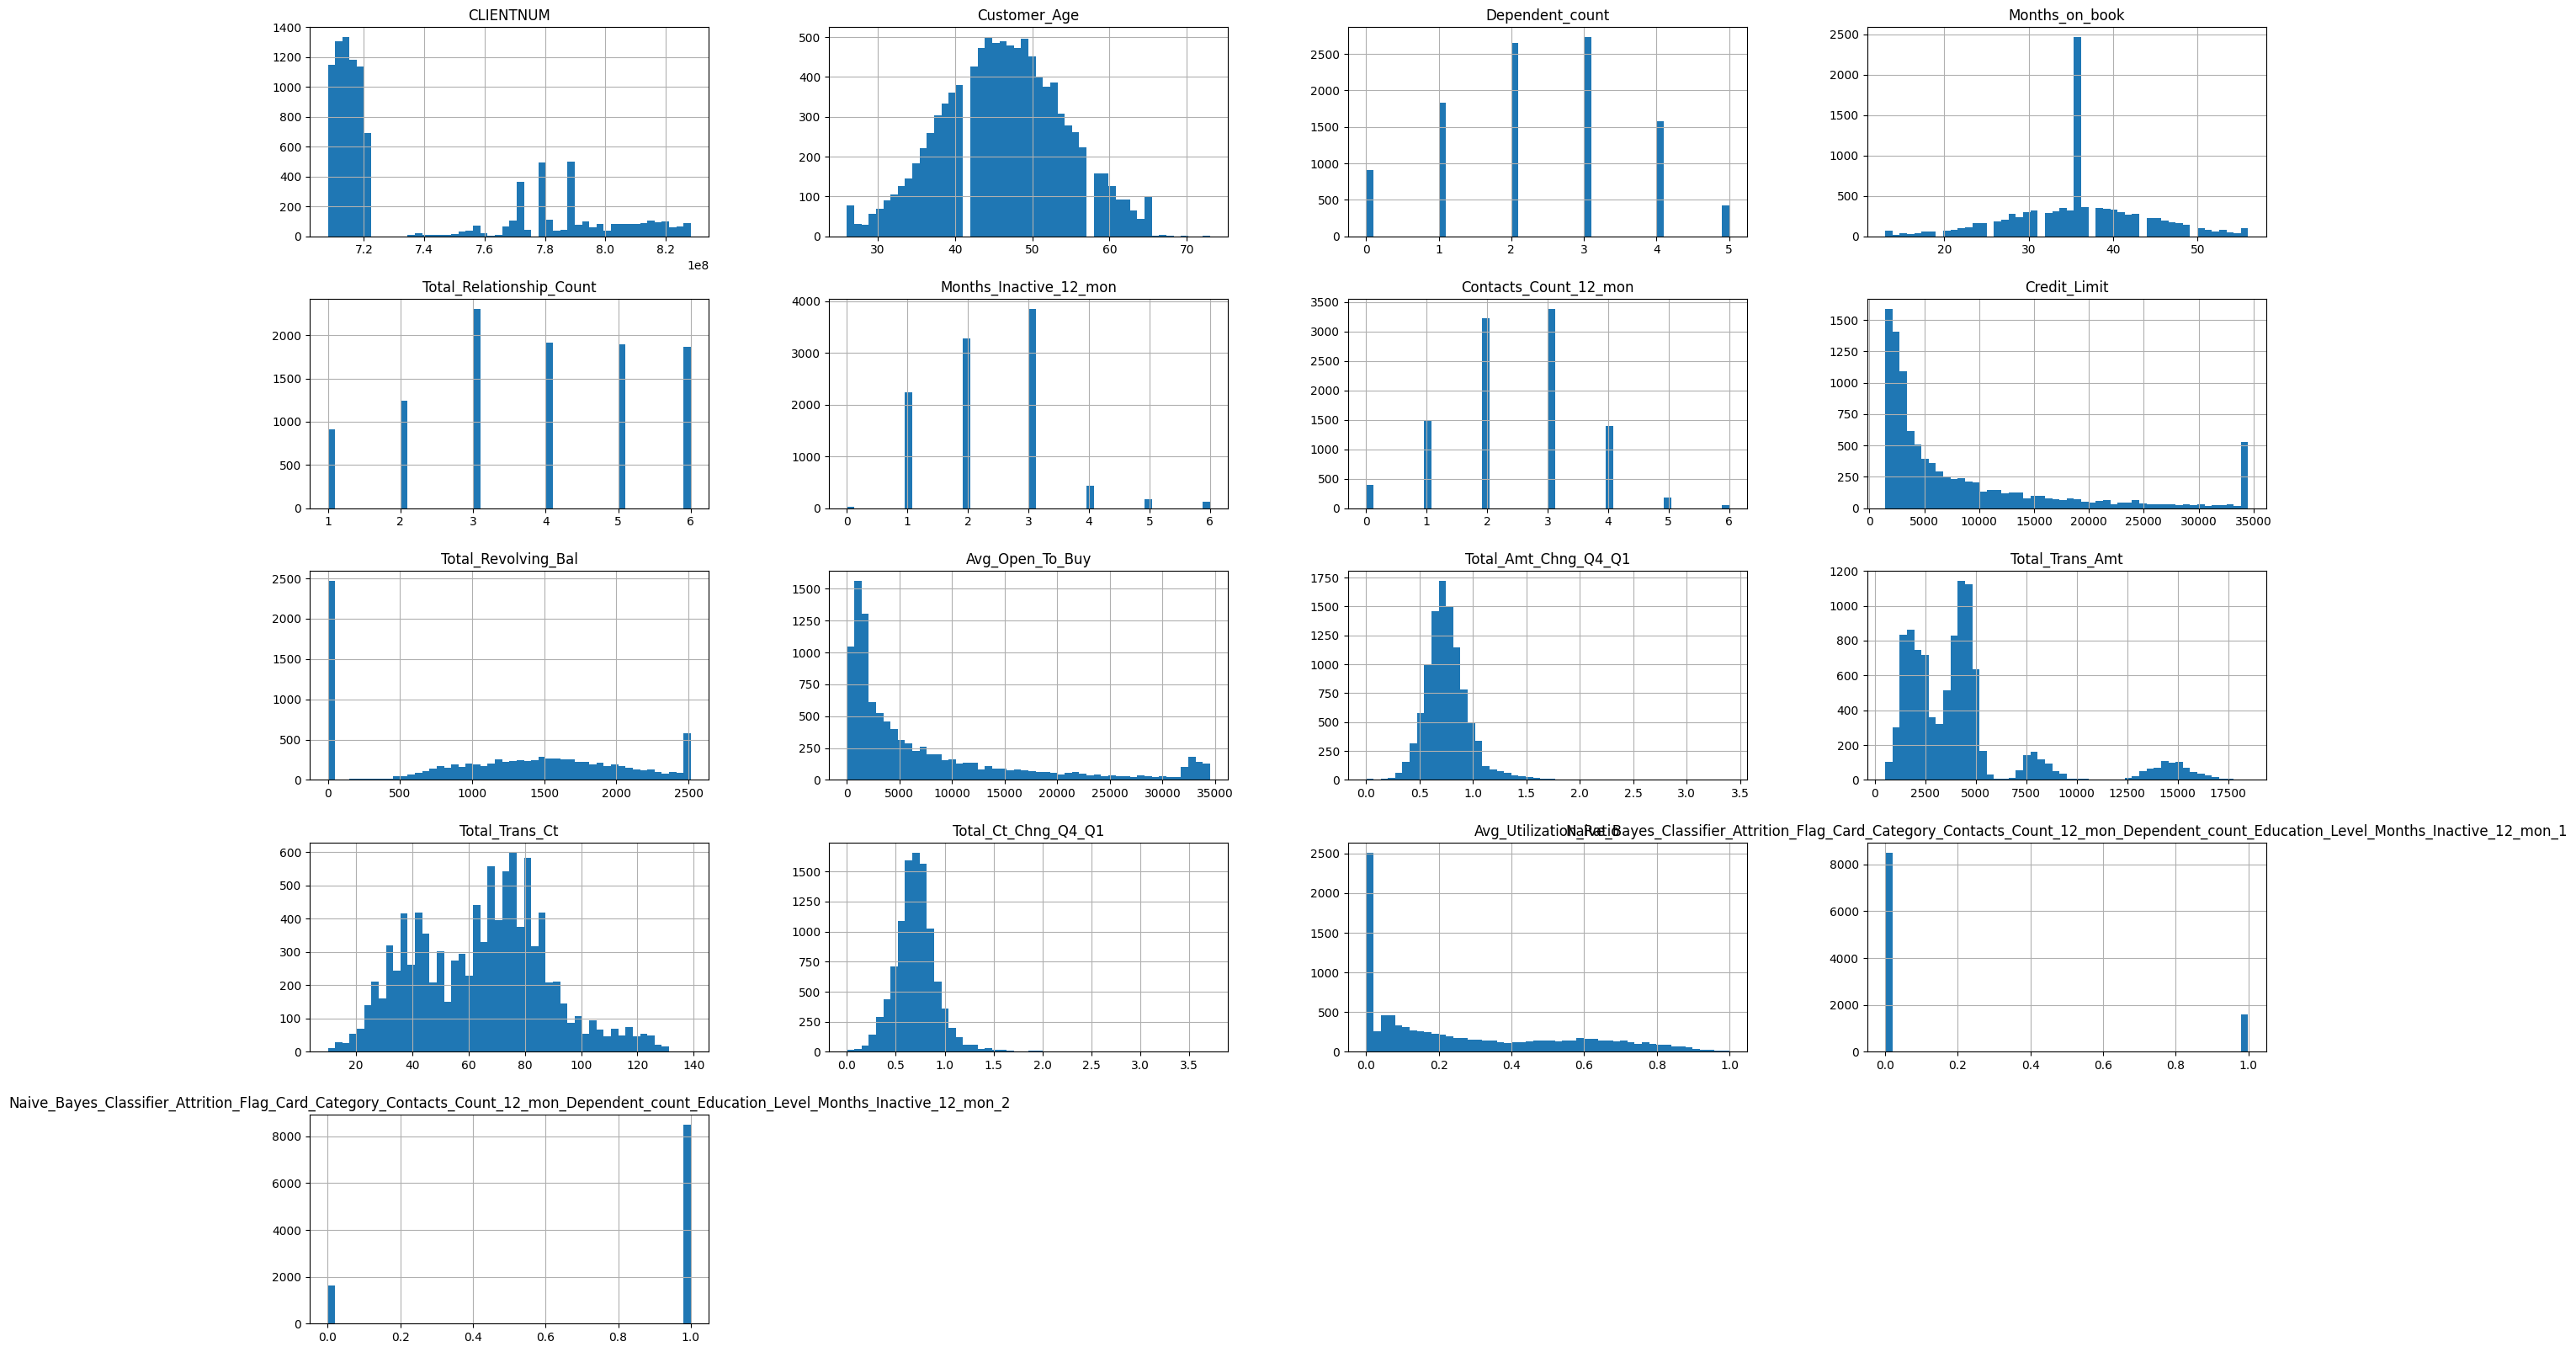

In [9]:
df[num_cols[0]].hist(figsize=(30,20), bins = 50)


In [10]:
temp = group_cols_by_data_type(df)
temp

([['CLIENTNUM',
   'Customer_Age',
   'Dependent_count',
   'Months_on_book',
   'Total_Relationship_Count',
   'Months_Inactive_12_mon',
   'Contacts_Count_12_mon',
   'Credit_Limit',
   'Total_Revolving_Bal',
   'Avg_Open_To_Buy',
   'Total_Amt_Chng_Q4_Q1',
   'Total_Trans_Amt',
   'Total_Trans_Ct',
   'Total_Ct_Chng_Q4_Q1',
   'Avg_Utilization_Ratio',
   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
   'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']],
 [['Attrition_Flag',
   'Gender',
   'Education_Level',
   'Marital_Status',
   'Income_Category',
   'Card_Category']],
 [[]],
 [[]])

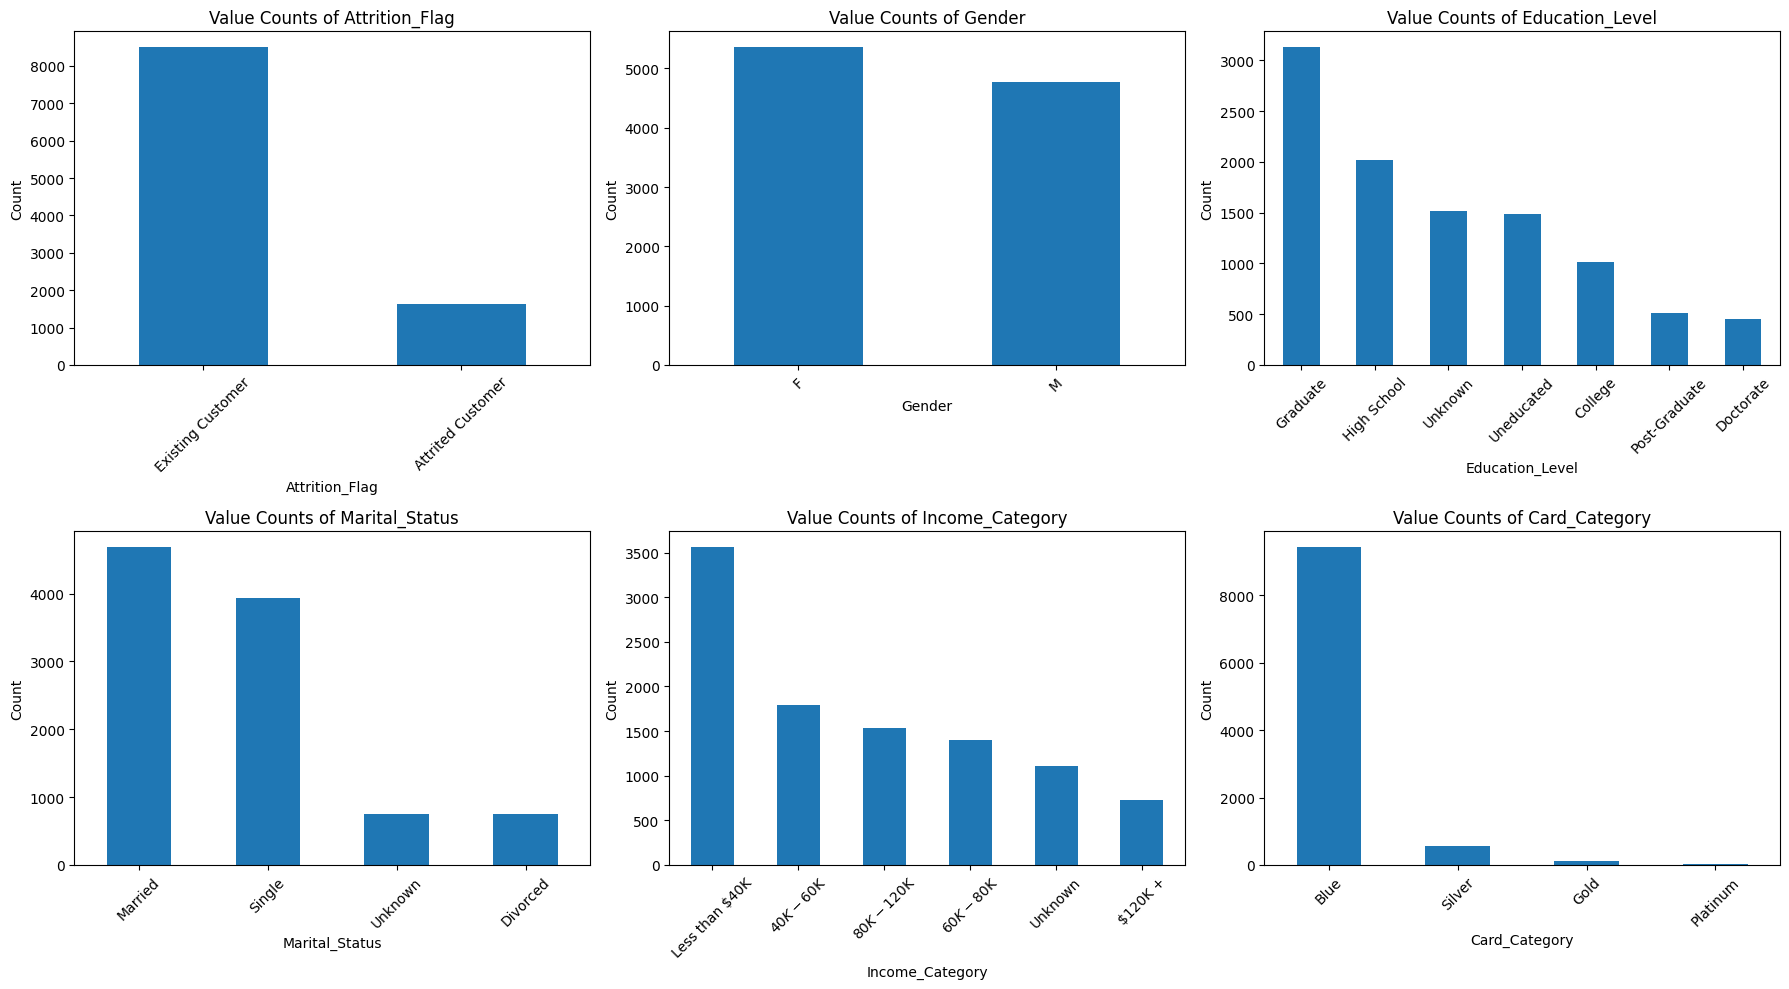

In [11]:
# Tạo subplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Chuyển về dạng 1D để dễ xử lý

# Vẽ biểu đồ value_counts cho từng cột
for i, col in enumerate(cat_cols[0]):
    df[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Value Counts of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()

In [12]:
import copy 
dfs = df.copy(deep = True)

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in cat_cols[0]:
    dfs[column]=le.fit_transform(dfs[column])
dfs.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,1,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,1,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,1,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,1,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [14]:
import seaborn as sns

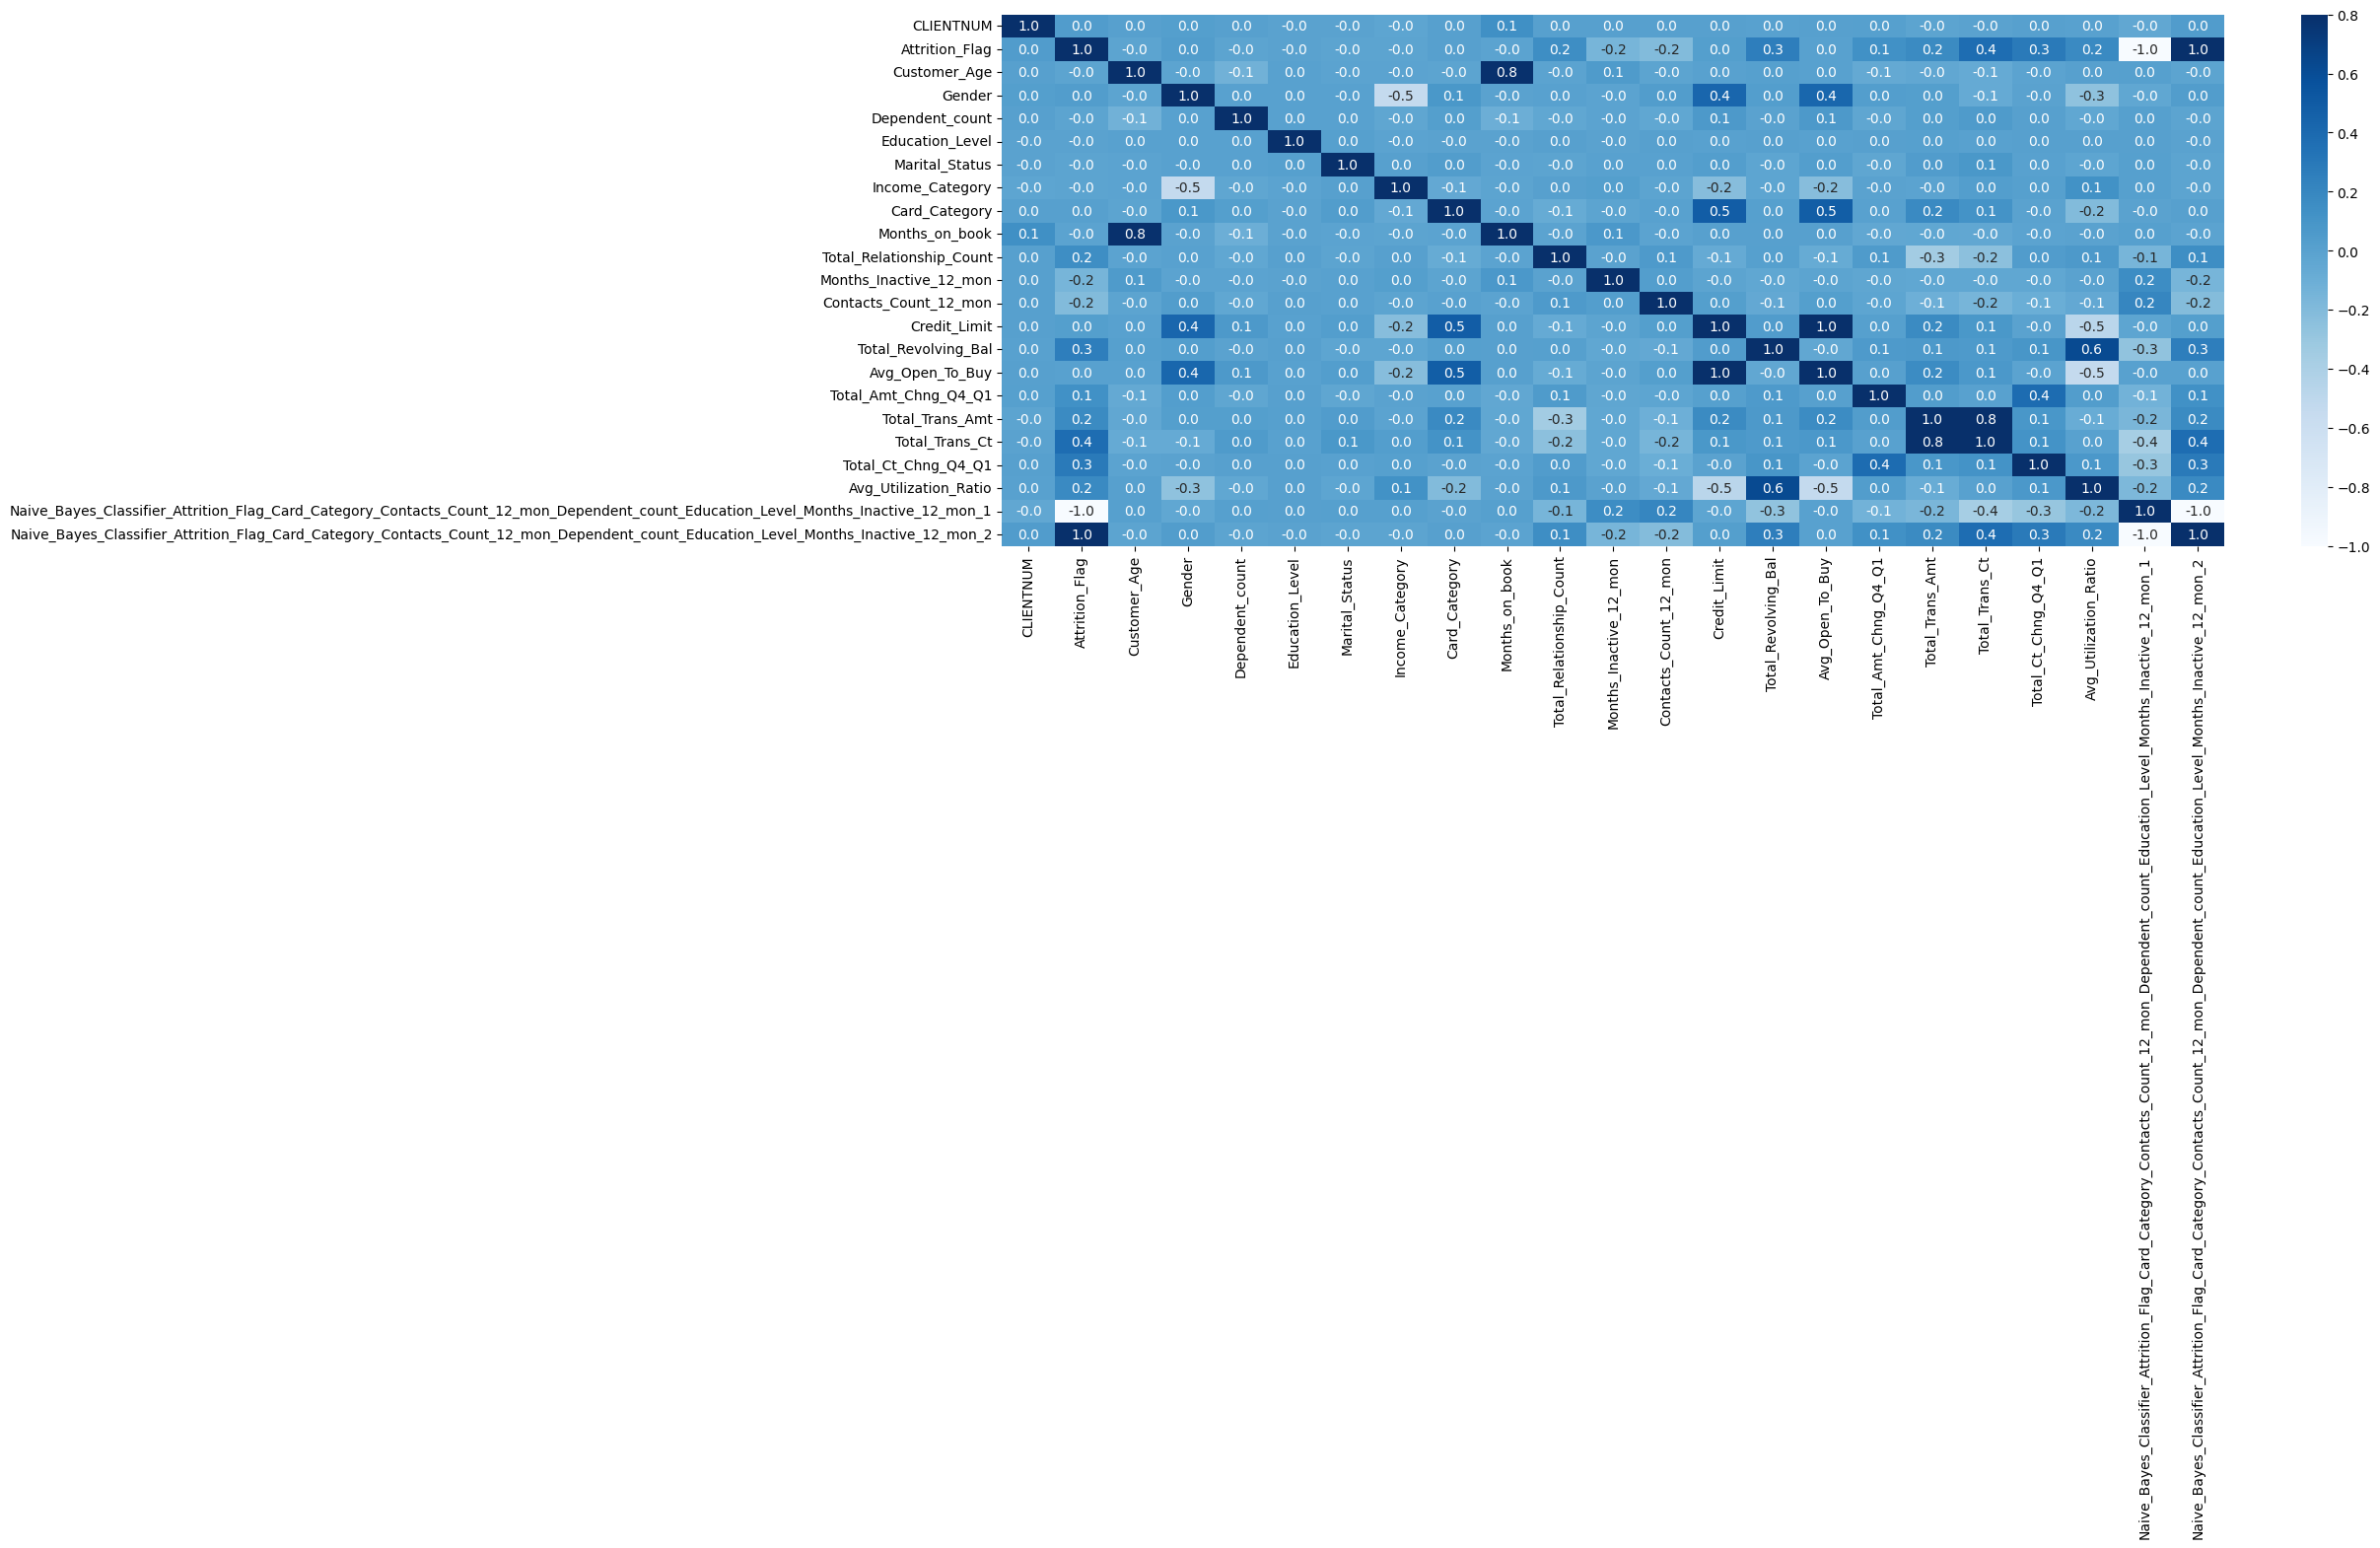

In [15]:
plt.figure(figsize=(20,7))
correlation=dfs.corr()
sns.heatmap(correlation,vmin=None,
    vmax=0.8,
    cmap='Blues',
    annot=True,
    fmt='.1f',
    linecolor='white',
    cbar=True);

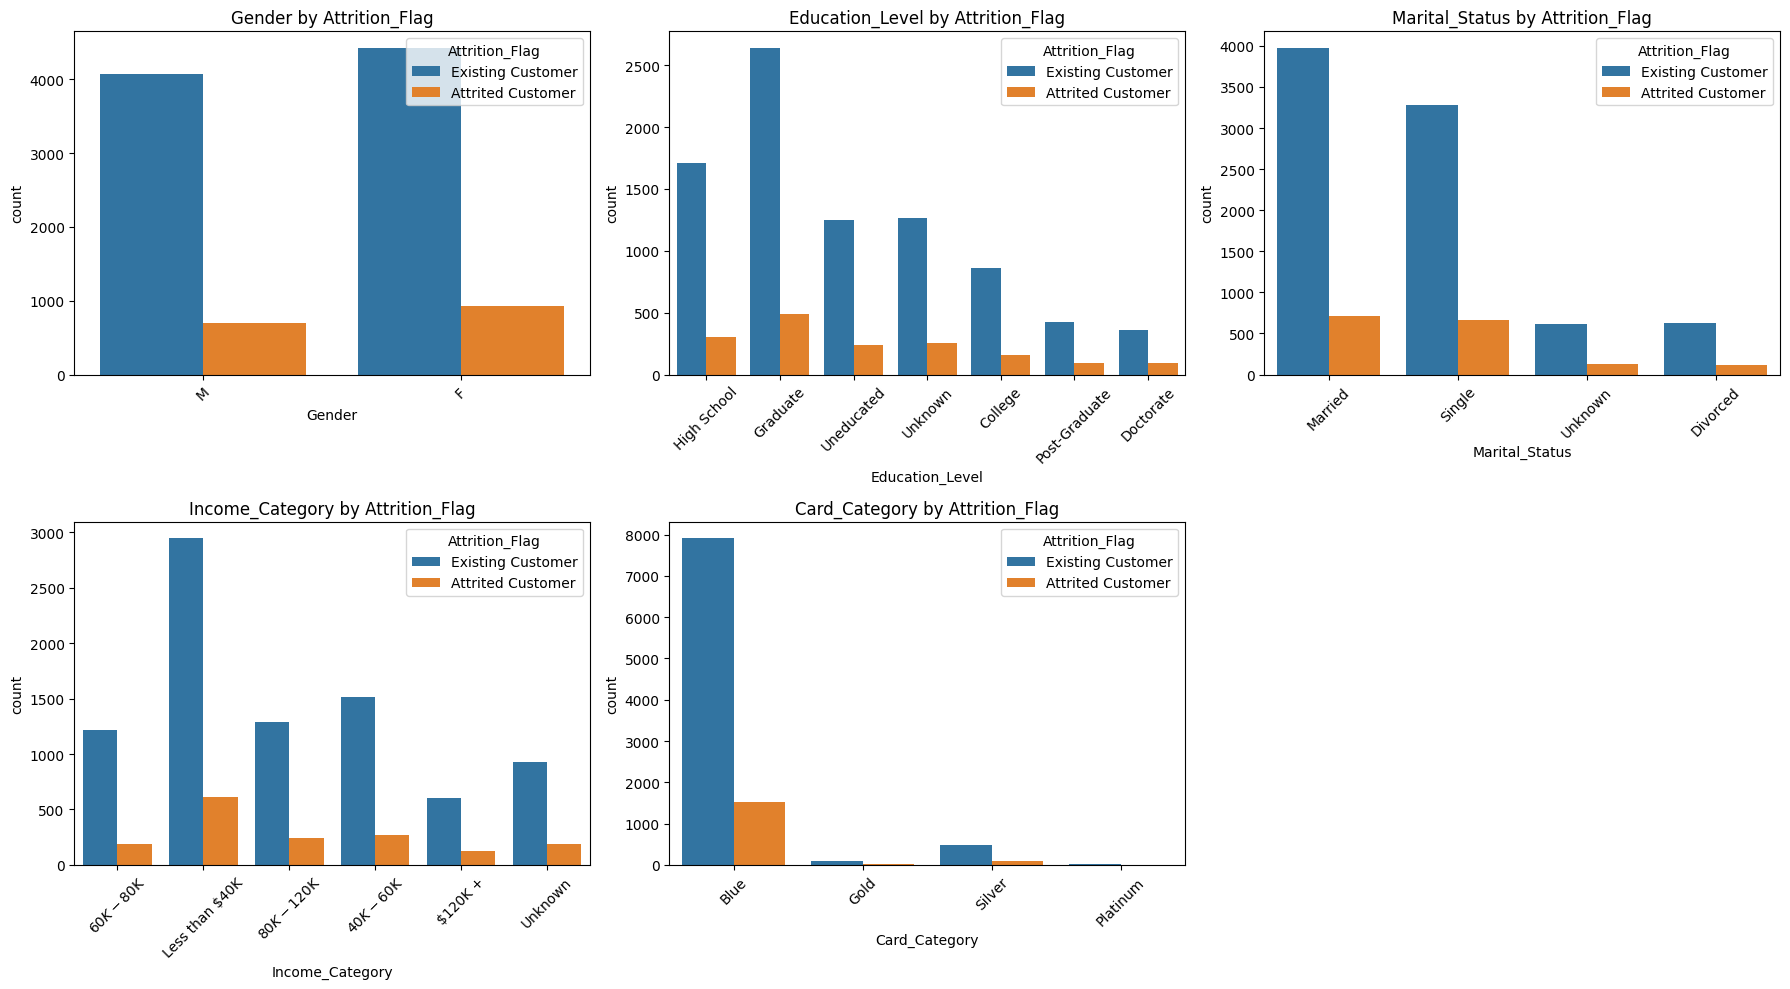

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 
            'Income_Category', 'Card_Category']

n = len(cat_cols)
rows = (n + 2) // 3  # 2 hoặc 3 hàng tùy số lượng
fig, axes = plt.subplots(rows, 3, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='Attrition_Flag', ax=axes[i])
    axes[i].set_title(f'{col} by Attrition_Flag')
    axes[i].tick_params(axis='x', rotation=45)

# Xoá subplot thừa nếu có
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MaxAbsScaler, maxabs_scale, OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
# from imblearn.over_sampling import SMOTE,ADASYN
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_recall_fscore_support, classification_report,confusion_matrix,mean_squared_error 
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_tree
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.image as mpimg
import time
import datetime

In [18]:
def preprocessing(df_temp):
    dfs = df_temp.copy(deep = True)
    dfs.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis="columns", inplace=True)
    ft = dfs.columns.difference(["Attrition_Flag"])
    category_ft = dfs.select_dtypes(exclude=np.number).columns

    enc = OrdinalEncoder()
    enc.fit(dfs[category_ft])
    dfs[category_ft] = enc.transform(dfs[category_ft])

    labelencoder = LabelEncoder()
    dfs["Attrition_Flag"] = labelencoder.fit_transform(dfs["Attrition_Flag"])

    X = dfs[ft]
    y = dfs["Attrition_Flag"]
    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)
    
    # Scale features
    scaler = MaxAbsScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    # df_train[df_train.select_dtypes(include=np.number).columns] = df_train[df_train.select_dtypes(include=np.number).columns].apply(
    #     lambda x: (x - x.min()) / (x.max()-x.min()))
    # df_test[df_train.select_dtypes(include=np.number).columns] = df_test[df_train.select_dtypes(include=np.number).columns].apply(
    #     lambda x: (x - x.min()) / (x.max()-x.min()))
    # Fill empty values by 0
    return X_train, X_test, y_train, y_test

In [19]:
def train_temp(X_train, y_train, X_test, y_test):
    # Train model
    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "Extra Trees": ExtraTreesClassifier(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": xgb.XGBClassifier()
    }
    results = {}
    for name, model in models.items():
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
        results[name] = {
            "accuracy": accuracy,
            "f1": f1,
            "precision": precision,
            "recall": recall,
            "time": end_time - start_time
        }
        print(f"{name} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Time: {end_time - start_time:.2f} seconds")
        print(classification_report(y_test, y_pred))
    return results


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import xgboost as xgb
import time
import pandas as pd

ft_importance = {}
def train_temp(X_train, y_train, X_test, y_test):
    models = {
        "Decision Tree": DecisionTreeClassifier(),
        "Extra Trees": ExtraTreesClassifier(),
        "Random Forest": RandomForestClassifier(),
        "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    }
    results = {}

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()

    for idx, (name, model) in enumerate(models.items()):
        print(f"\n🔧 Training model: {name}")
        
        # Train
        train_start = time.time()
        model.fit(X_train, y_train)
        train_end = time.time()

        # Predict
        test_start = time.time()
        y_pred = model.predict(X_test)
        test_end = time.time()

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

        results[name] = {
            "accuracy": accuracy,
            "f1": f1,
            "precision": precision,
            "recall": recall,
            "train_time": train_end - train_start,
            "test_time": test_end - test_start
        }
        ft_importance[name] = model.feature_importances_

        print(f"{name} - Accuracy: {accuracy:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, Train Time: {train_end - train_start:.4f}s, Test Time: {test_end - test_start:.4f}s")
        print(classification_report(y_test, y_pred))

        # Confusion matrix plot
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                    xticklabels=['Existing', 'Attrited'],
                    yticklabels=['Existing', 'Attrited'])
        axes[idx].set_title(f'Confusion Matrix: {name}')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # In bảng kết quả
    results_df = pd.DataFrame(results).T
    print("\n📊 Tổng hợp kết quả các mô hình:")
    print(results_df.to_string(float_format="%.10f"))

    return results_df



🔧 Training model: Decision Tree
Decision Tree - Accuracy: 0.9378, F1: 0.9630, Precision: 0.9624, Recall: 0.9636, Train Time: 0.0794s, Test Time: 0.0000s
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       325
           1       0.96      0.96      0.96      1701

    accuracy                           0.94      2026
   macro avg       0.89      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026


🔧 Training model: Extra Trees
Extra Trees - Accuracy: 0.9398, F1: 0.9650, Precision: 0.9423, Recall: 0.9888, Train Time: 0.4599s, Test Time: 0.0240s
              precision    recall  f1-score   support

           0       0.92      0.68      0.78       325
           1       0.94      0.99      0.97      1701

    accuracy                           0.94      2026
   macro avg       0.93      0.84      0.87      2026
weighted avg       0.94      0.94      0.94      2026


🔧 Training model: Random Forest
Random Fo

c:\Users\tqdcr\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:05:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Accuracy: 0.9684, F1: 0.9813, Precision: 0.9750, Recall: 0.9877, Train Time: 0.1692s, Test Time: 0.0040s
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       325
           1       0.98      0.99      0.98      1701

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026



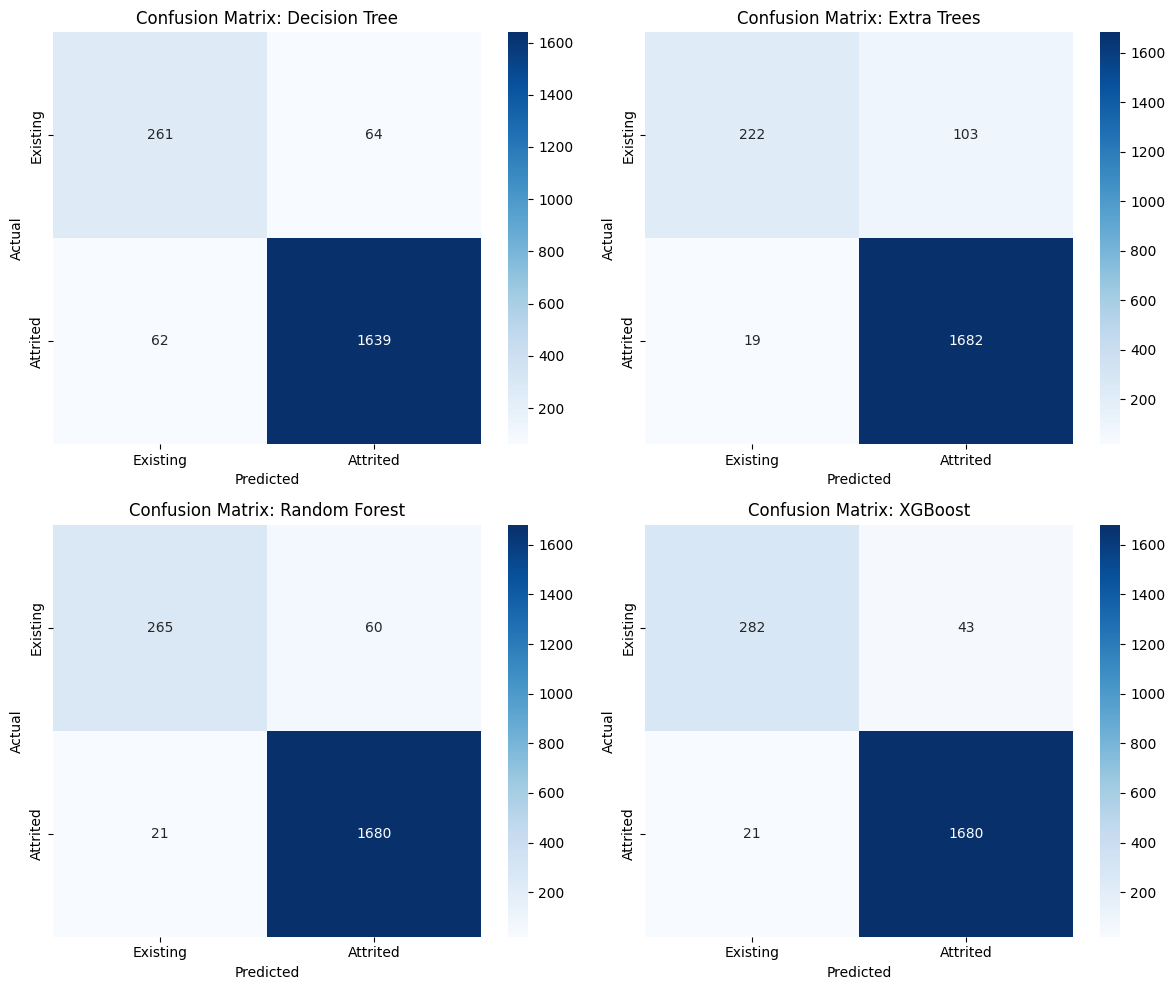


📊 Tổng hợp kết quả các mô hình:
                  accuracy           f1    precision       recall   train_time    test_time
Decision Tree 0.9378084896 0.9629847239 0.9624192601 0.9635508524 0.0794262886 0.0000000000
Extra Trees   0.9397828233 0.9650028686 0.9422969188 0.9888300999 0.4599285126 0.0240440369
Random Forest 0.9600197433 0.9764603313 0.9655172414 0.9876543210 1.3615324497 0.0170388222
XGBoost       0.9684106614 0.9813084112 0.9750435287 0.9876543210 0.1692135334 0.0040056705


In [27]:
X_train, X_test, y_train, y_test =  preprocessing(df)
result = train_temp(X_train, y_train, X_test, y_test)

In [28]:
ft_importance

{'Decision Tree': array([0.02275388, 0.00744716, 0.01297632, 0.        , 0.0168748 ,
        0.01754946, 0.03591464, 0.01047367, 0.00787268, 0.00122017,
        0.00572197, 0.00795438, 0.01344366, 0.01329295, 0.05843383,
        0.07530529, 0.09107087, 0.17800446, 0.12458745, 0.29910236]),
 'Extra Trees': array([0.03187325, 0.04921516, 0.02763751, 0.0062206 , 0.04728724,
        0.03216479, 0.02995813, 0.02561198, 0.02366922, 0.01691703,
        0.02221551, 0.02261377, 0.03990943, 0.02946084, 0.0449994 ,
        0.07453625, 0.07296268, 0.10988356, 0.13022627, 0.1626374 ]),
 'Random Forest': array([0.03089111, 0.05548394, 0.02632742, 0.00183893, 0.027316  ,
        0.03279375, 0.03002505, 0.01280266, 0.01166477, 0.00624879,
        0.01101055, 0.00864217, 0.02283107, 0.0230055 , 0.06273129,
        0.11395223, 0.06298934, 0.11793874, 0.17816799, 0.16333869]),
 'XGBoost': array([0.02778489, 0.01374409, 0.00963683, 0.00562035, 0.02993675,
        0.01690188, 0.03394449, 0.00783834, 0.0112

In [29]:
def ft_selection(df_temp, ft_importance_dict):
    dfs = df_temp.copy(deep=True)
    
    # Bỏ 2 cột không cần thiết
    cols_to_drop = [
        "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
        "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
    ]
    dfs.drop(cols_to_drop, axis="columns", inplace=True)
    
    # Tên các feature (loại bỏ cột target)
    ft_names = dfs.columns.difference(["Attrition_Flag"])

    # Tính trung bình của các giá trị importance từ các mô hình
    importances = list(ft_importance_dict.values())
    avg_importance = sum(importances) / len(importances)

    # In danh sách sắp xếp
    print("Features sorted by their average importance:")
    sorted_features = sorted(zip(map(lambda x: round(x, 4), avg_importance), ft_names), reverse=True)
    for val, name in sorted_features:
        print(f"{name}: {val}")

    # Lưu danh sách được chọn sao cho tổng importance >= 0.9
    total = 0
    selected_features = []
    for importance, name in sorted_features:
        total += importance
        selected_features.append(name)
        if total >= 0.9:
            break

    print(f"\nSelected {len(selected_features)} features with cumulative importance >= 0.9")
    return selected_features


In [30]:
selected_ft = ft_selection(dfs, ft_importance)

Features sorted by their average importance:
Total_Trans_Ct: 0.2211
Total_Revolving_Bal: 0.1553
Total_Trans_Amt: 0.1242
Total_Relationship_Count: 0.0889
Total_Ct_Chng_Q4_Q1: 0.0789
Total_Amt_Chng_Q4_Q1: 0.0495
Customer_Age: 0.0325
Avg_Utilization_Ratio: 0.0315
Contacts_Count_12_mon: 0.0304
Months_Inactive_12_mon: 0.0294
Avg_Open_To_Buy: 0.0283
Credit_Limit: 0.0249
Months_on_book: 0.0196
CLIENTNUM: 0.0191
Dependent_count: 0.0142
Education_Level: 0.0136
Marital_Status: 0.0134
Income_Category: 0.0125
Gender: 0.0093
Card_Category: 0.0034

Selected 13 features with cumulative importance >= 0.9


In [23]:
def ft_selection(df_temp, dt_feature, rf_feature, et_feature, xgb_feature):
    
    dfs = df_temp.copy(deep = True)
    dfs.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], axis="columns", inplace=True)

    ft = dfs.columns.difference(["Attrition_Flag"])
    # calculate the average importance value of each feature
    avg_feature = (dt_feature + rf_feature + et_feature + xgb_feature)/4

    print ("Features sorted by their score:")
    print (sorted(zip(map(lambda x: round(x, 4), avg_feature), ft), reverse=True))

    f_list = sorted(zip(map(lambda x: round(x, 4), avg_feature), ft), reverse=True)
    print(len(f_list))

    # Select the important features from top-importance to bottom-importance until the accumulated importance reaches 0.9 (out of 1)
    Sum = 0
    fs = []
    for i in range(0, len(f_list)):
        Sum = Sum + f_list[i][0]
        fs.append(f_list[i][1])
        if Sum>=0.9:
            break   
    
     
  
    fig = plt.figure(figsize=(30, 10))
    plt.plot(ft, dt_feature, linestyle = 'dashed') 
    plt.plot(ft, rf_feature, linestyle = 'dashed')
    plt.plot(ft, et_feature, linestyle = 'dashed')
    plt.plot(ft, xgb_feature, linestyle = 'dashed')
    plt.plot(ft, avg_feature, linewidth = '10')
    plt.xlabel("Features")  # add X-axis label 
    plt.ylabel("Importance score")  # add Y-axis label 
    plt.title("Immportnace score chart")  # add title 
    plt.xticks(rotation=30, ha='right')
    plt.legend(['Decision Tree Importance Score', 'Random Forest Importance Score','Extra Tree Importance Score','XGBoost Importance Score',"XGBoost Stacking Model"]) 
    plt.show() 
    
    return fs
    # category_ft = dfs.select_dtypes(exclude=np.number).columns
    # enc = OrdinalEncoder()
    # enc.fit(dfs[category_ft])
    # dfs[category_ft] = enc.transform(dfs[category_ft])

    # labelencoder = LabelEncoder()
    # dfs["landslide_size"] = labelencoder.fit_transform(dfs["landslide_size"])
    
    

    # scaler = MaxAbsScaler()
    # X_train = scaler.fit_transform(X_train)
    # X_test = scaler.transform(X_test)

    # print(y_train.value_counts())
    # print(y_test.value_counts())
    # print (fs, len(fs))
    # print(y_train)
    
    # return X_train, y_train, X_test, y_test


In [ ]:
def final_train(df_temp, selected_ft):
    dfs = df_temp.copy(deep=True)
    
    # Bỏ 2 cột không cần thiết
    cols_to_drop = [
        "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
        "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
    ]
    dfs.drop(cols_to_drop, axis="columns", inplace=True)
    
    # Tên các feature (loại bỏ cột target)
    ft_names = dfs.columns.difference(["Attrition_Flag"])

    # Chọn các feature đã được chọn
    X = dfs[selected_ft]
    y = dfs["Attrition_Flag"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0, stratify=y)
    
    # Scale features
    scaler = MaxAbsScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Metrics

   DecisionTree  RandomForest  ExtraTrees  XgBoost
0             1             1           1        1
1             1             1           1        1
2             1             1           1        1
3             1             1           1        1
4             1             1           1        1


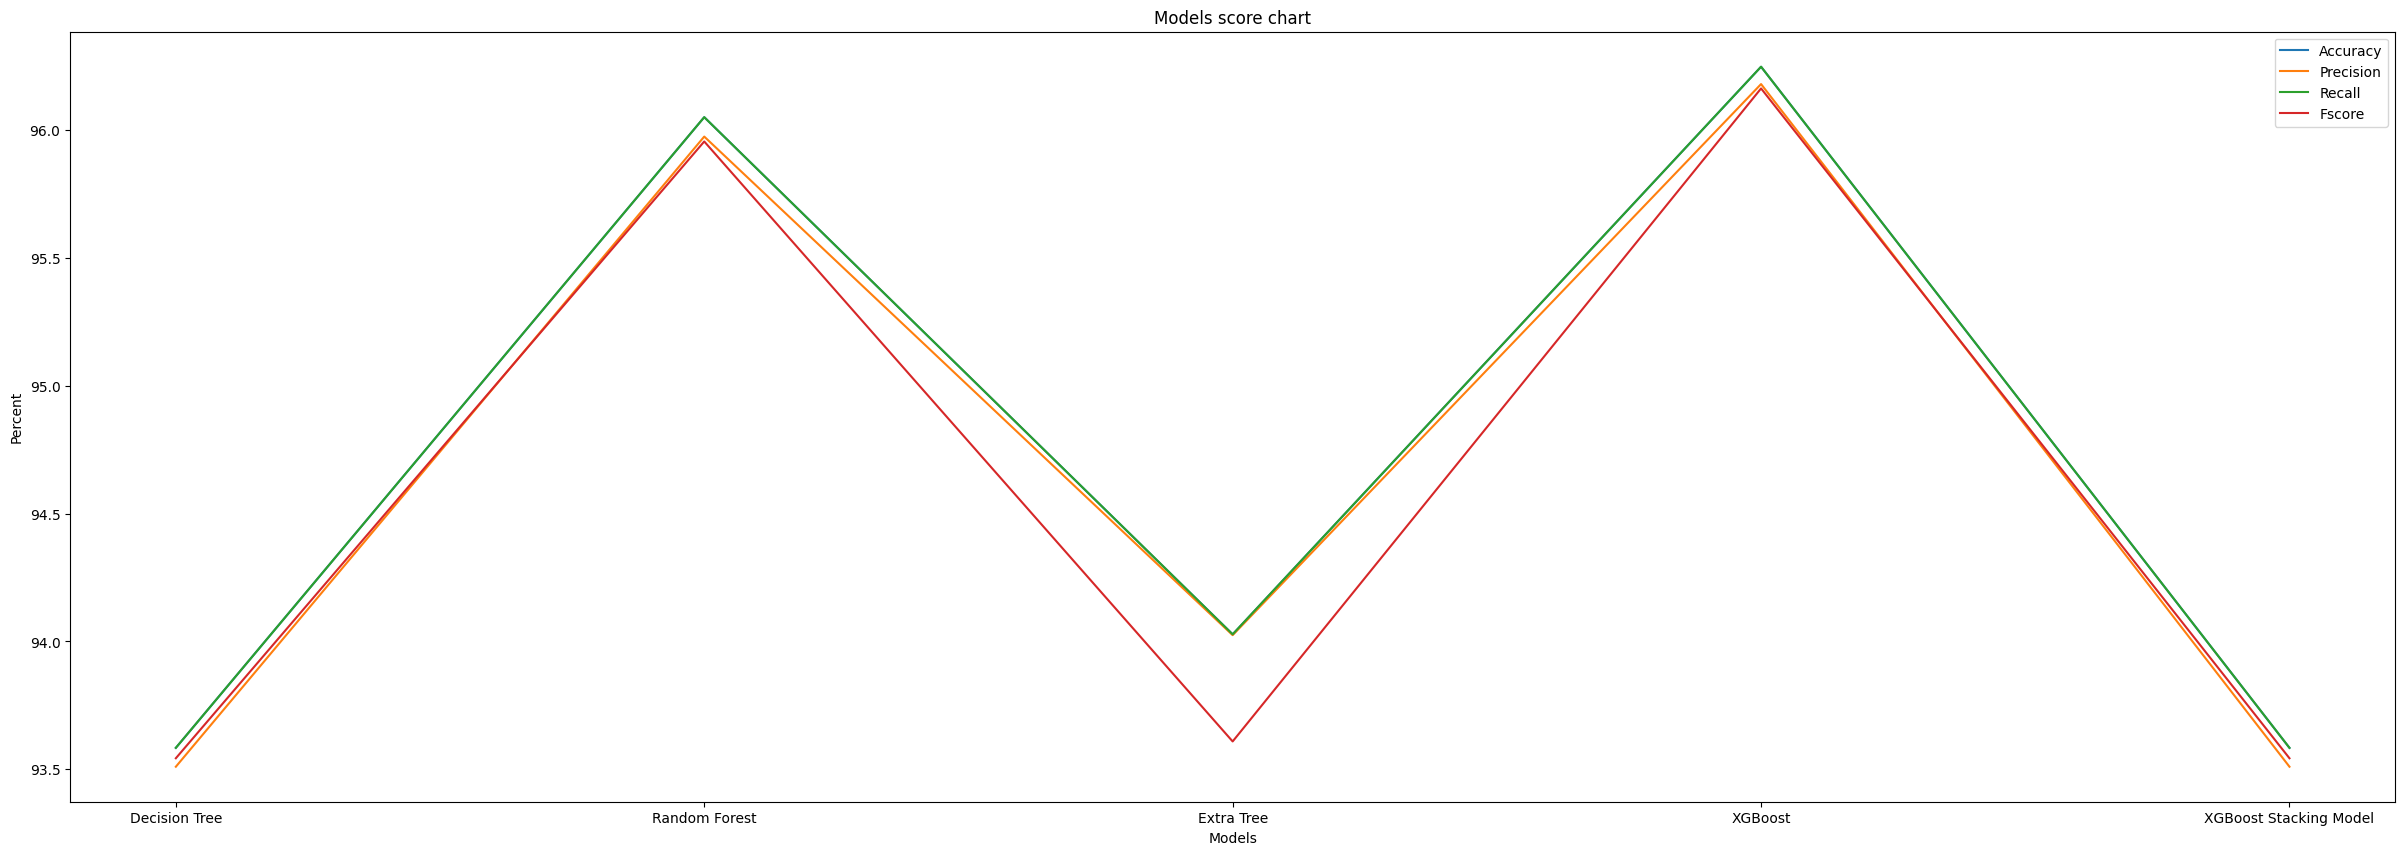

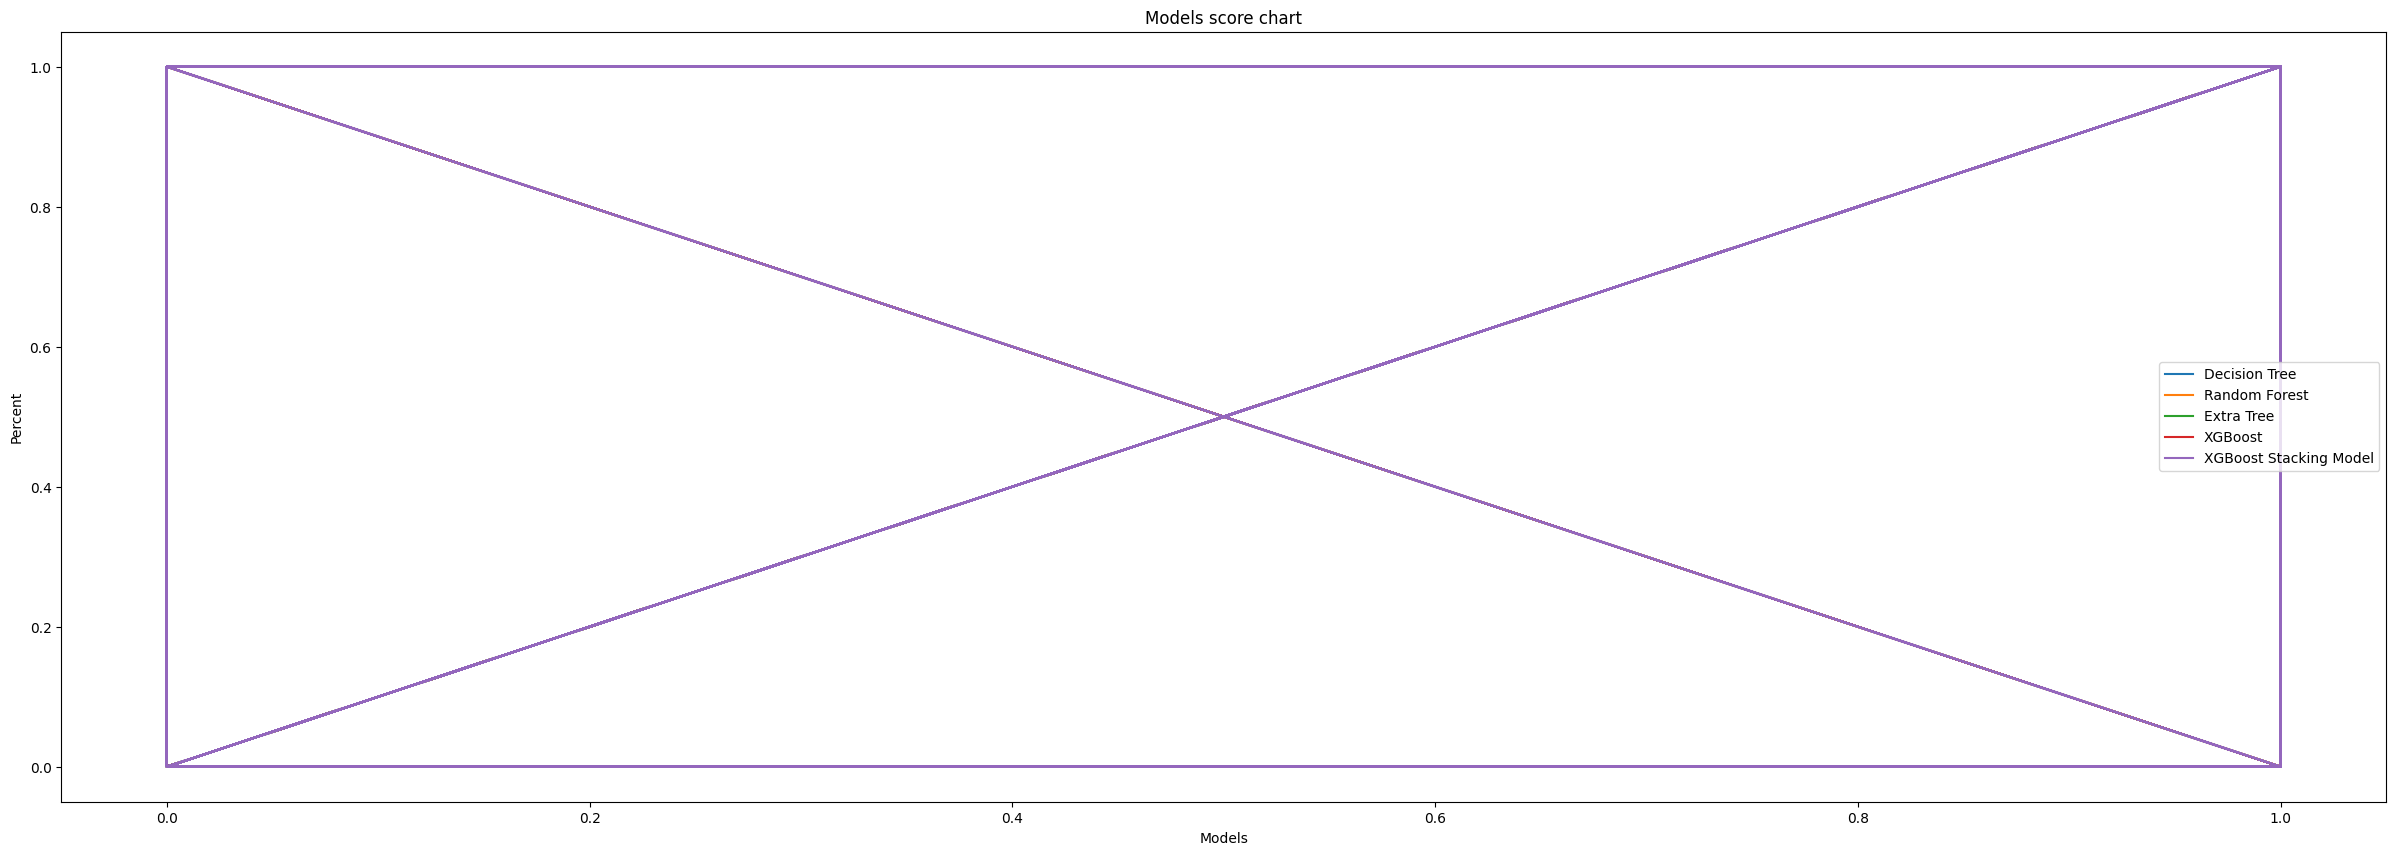

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       325
           1       0.96      0.96      0.96      1701

    accuracy                           0.94      2026
   macro avg       0.88      0.87      0.88      2026
weighted avg       0.94      0.94      0.94      2026



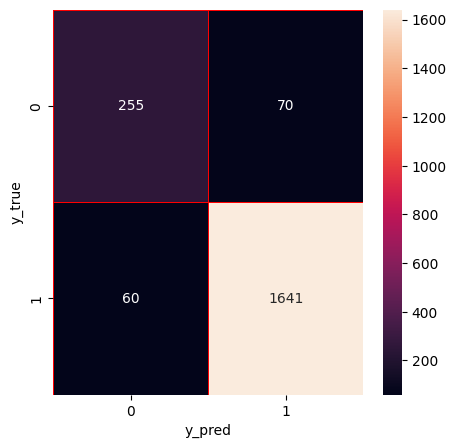

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       325
           1       0.97      0.99      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.95      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026



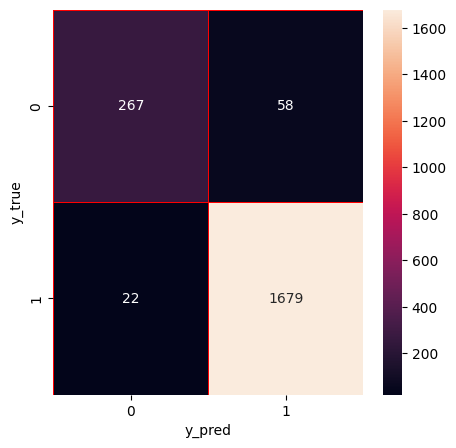

              precision    recall  f1-score   support

           0       0.94      0.67      0.78       325
           1       0.94      0.99      0.97      1701

    accuracy                           0.94      2026
   macro avg       0.94      0.83      0.87      2026
weighted avg       0.94      0.94      0.94      2026



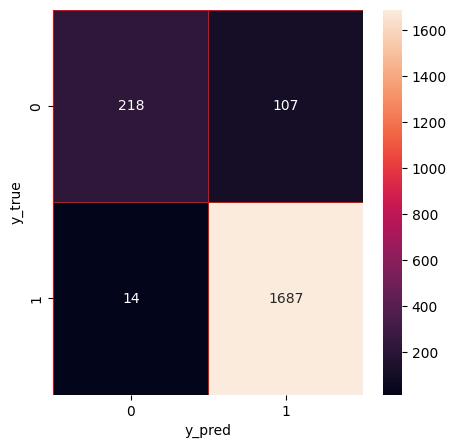

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       325
           1       0.97      0.99      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026



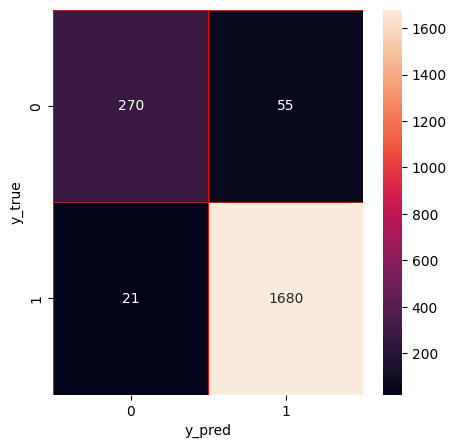

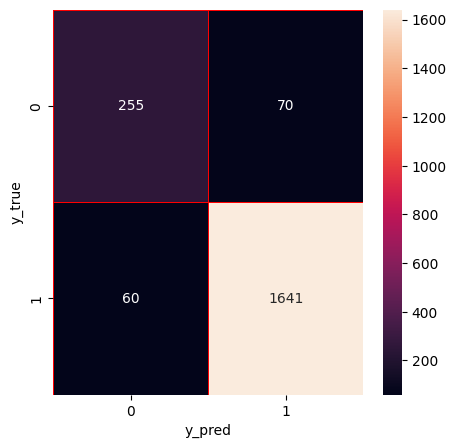

              precision    recall  f1-score   support

           0       0.81      0.78      0.80       325
           1       0.96      0.96      0.96      1701

    accuracy                           0.94      2026
   macro avg       0.88      0.87      0.88      2026
weighted avg       0.94      0.94      0.94      2026

                    Model   Accuracy  Precision     Recall     fscore
0           Decision Tree  93.583416  93.509593  93.583416  93.542689
1           Random Forest  96.051333  95.975399  96.051333  95.956247
2              Extra Tree  94.027641  94.024420  94.027641  93.608511
3                 XGBoost  96.248766  96.180859  96.248766  96.163801
4  XGBoost Stacking Model  93.583416  93.509593  93.583416  93.542689


In [ ]:
X_train, X_test, y_train, y_test =  preprocessing(df)
# dt_feature, rf_feature, et_feature, xgb_feature = train(X_train, y_train, X_test, y_test)